<a href="https://colab.research.google.com/github/lfmartins/introduction-to-computational-mathematics/blob/main/14-odesandforwardeuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Differential Equations

Differential equations are equations that are composed of derivatives of functions and functions. Since it's an equation we know that '$=$' present and the derivatives are with respect to an independent variable, e.g. $t$, $x$. If we only have one independent variable in our solution then we say that this is and ordinary differential equation (ODE).

Here are a few examples:

*  ${dy\over dt} =cy,\qquad c=$constant
*  ${dy\over dx} = x^2-2x$

*  $m{d^2y\over dt^2}+ \beta{dy\over dt}+gy=0$

In MTH 286, we spend time learning methods for analytical solutions to these equations. These solutions are functions with respect to the independent variable. General solutions for the above equations are the following:

*  $y = Ae^{ct}$
*  $y = {1\over3}x^3-x^2 + C$
*  $y=e^{pt}(A\cos(\omega t)+B\sin(\omega t))$ or $Ae^{p_1t}+Be^{p_2t}$ or $(A+Bt)e^{pt}$

The constants $A,B,C$ are determined by the initial conditions of the differential equation. These solutions satisfy the equations that we listed above. For example, in the first equation

$${dy \over dt}={d \over dt}(Ae^{ct})=cAe^{ct}=cy$$


To deal with $A$, we have an initial condition, for example $y(0)=2$. So for our general solution $y(0)=Ae^{c\cdot0}=A\cdot1=A=2$. So $A=2$ and the unique solution is $y(t)=2e^{ct}$, which satisfies the ODE ${dy\over dt}=cy, y(0)=2$.

However, this approach is limited to differential equations that follow a certain form. Most times we cannot develop an analytical solution to a differential equation. 


Instead, we will learn to use numerical approximations to generate approximate solutions. This approach allows us a lot of flexibility, with the caveat that we now need to keep in mind error associated with approximation.


# Forward Euler

One of the most basic (and useful) methods to use for this process is Forward Euler. We will first deal with first-order, initial value problems that are in normal form:

$${dy\over dt}=f(y,t), \qquad y(0)=y_0$$

Given a general point $t_i$, we start by treating the derivative on the left side using a forward difference approximation

$${dy\over dt}\approx \frac{y(t_{i+1})-y(t_{i})}{h}=\frac{y_{i+1}-y_{i}}{h}$$

where $y(t_i)=y_i$ is the numerical solution at $t_i$. Note that $t_{i+1}=t_i+h$

If we're starting from an initial value or an approximation at timestep $t_i$, then we can use this approximation to the derivative to predict at the next timestep 
$$\frac{y_{i+1}-y_{i}}{h}=f(t_i,y_i)$$
$$\frac{y_{i+1}}{h}=\frac{y_{i}}{h}+f(t_i,y_i)$$
$$⇒ y_{i+1}=y_{i}+hf(t_i,y_i)$$

Forward Euler advances the solution from the initial value using a forward difference approximation to the derivative

**<center>Forward Euler</center>**
$$y_{i+1}=y_{i}+hf(t_i,y_i),\qquad y(0)=y_0$$

To understand how Forard Euler works, we are going to examine this with a very simple ODE:

$$\frac{dy}{dt}=y,\qquad y(0)=1.0$$

Why such a simple ODE? Well, we know its analytical solution is $y(t)=e^{t}$, so we can compare the accuracy of our methods.

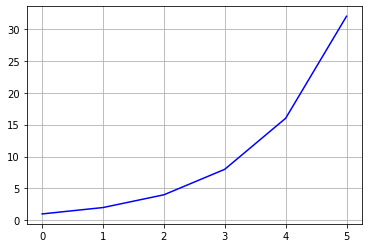

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def forwardEuler(y,f,h,t):
  ynew=y+h*f(t,y)
  return ynew
def fun(t,y):
  f=y
  return y

nT=5 #number of timesteps
t=np.linspace(0,5,nT+1)
y=np.zeros(nT+1)
y[0]=1.0
h=t[1]

for j in range(1,nT+1):
  y[j]=forwardEuler(y[j-1],fun,h,t[j-1])

plt.figure()
plt.plot(t,y,'-b')
plt.grid()

We can compare this numerical solution to the analytical solution, $y(t)=e^t$, using the same timesteps as the approximation.




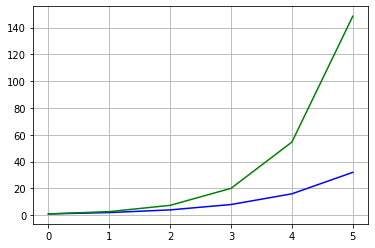

In [6]:
ytrue=np.exp(t)

plt.figure()
plt.plot(t,y,'-b',t,ytrue,'g')
plt.grid()


We see that the Forward Euler method grossly underestimates the solution. Computing the absolute error, we see that the error is also growing in time:


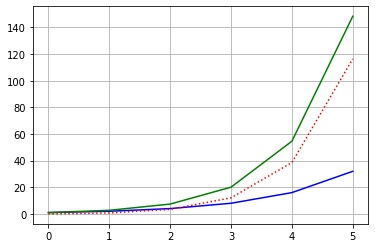

In [7]:
ytrue=np.exp(t)

plt.figure()
plt.plot(t,y,'-b',t,ytrue,'g',t,abs(y-ytrue),':r')
plt.grid()


However, if we run the simulation with a smaller stepsize $h$, we can have a more accurate solution. We do this in the code by increasing the number of timesteps within this interval. Increasing to 20 timesteps in the interval of [0,5], we see a decrease in the error 

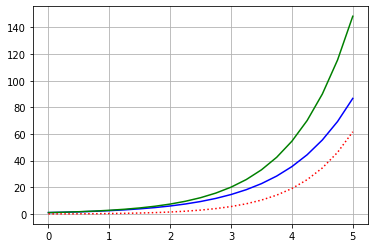

In [9]:
nT=20 #number of timesteps
t=np.linspace(0,5,nT+1)
y=np.zeros(nT+1)
y[0]=1.0
h=t[1]

ytrue=np.exp(t)

for j in range(1,nT+1):
  y[j]=forwardEuler(y[j-1],fun,h,t[j-1])

plt.figure()
plt.plot(t,y,'-b',t,ytrue,'g',t,abs(y-ytrue),':r')
plt.grid()

Increasing to 500 timesteps we see an even more accurate solution.

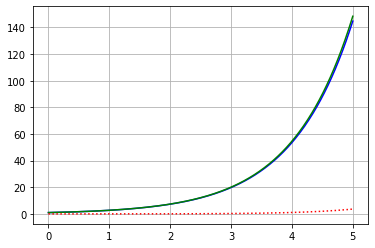

In [10]:
nT=500 #number of timesteps
t=np.linspace(0,5,nT+1)
y=np.zeros(nT+1)
y[0]=1.0
h=t[1]

ytrue=np.exp(t)

for j in range(1,nT+1):
  y[j]=forwardEuler(y[j-1],fun,h,t[j-1])

plt.figure()
plt.plot(t,y,'-b',t,ytrue,'g',t,abs(y-ytrue),':r')
plt.grid()

### Exercises

1. Adjust ``fun`` for the function $f(t,y)=y-t^2+1$ and use Forward Euler code to find the approximation for the interval $[0,2]$, with $h=0.2$ and $y(0)=0.5$. Compare the approximation with the solution $y=(t+1)^2-0.5e^t$.

2. Adjust ``fun`` for the function $f(t,y)=1+y/t$ and use Forward Euler code to find the approximation for the interval $[1,2]$, with $h=0.25$ and $y(1)=2$. 
Compare the approximation with the solution $y=2t+t\log(t)$.

3. Adjust ``fun`` for the function $f(t,y)=\cos(2t)+\sin(2t)$ and use Forward Euler to find the approximation for the interval $[0,1]$, with $h=0.25$ and $y(0)=1$. Compare the approximation with the solution $y=\frac{1}{2}\sin(2t)-\frac{1}{3}\cos(3t)+4/3$.




# Error

Note that in all of these cases, the error is still growing. Well there are two factors involved with this. 

One stems from using the forward difference approximation for the derivative. Assuming that $y(t_i)=y_i$, we can see that the method also emerges from taking a Taylor series of $y(t_{i+1})=y(t_i+h)$ centered at $a=t_i$

$$y(t_{i}+h)=y(t_{i})+h y'(t_i)+h^{2}{f''(\xi)\over2}=y_i+hf(t_i,y_i)+O(h^2), \qquad \xi\in[t_{i},t_{i}+h]$$

So we see that Forward Euler encompasses the first two terms of the Taylor series. 






# Local Error

Taking the absolute difference between the solution and the Forward Euler approximation

$$|y(t_i+h)-(y_{i}+hf(t_i,y_i))|=|y(t_i+h)-(y(t_{i})+hy(t_i))|=|O(h^{2})|=O(h^2)=Ch^{2}$$

we that Forward Euler has a second order, e.g. $O(h^2)$, local error.


In [34]:
h=.1 #number of timesteps
y[0]=1.0

ytrue=np.exp(h)

y[1]=forwardEuler(y[0],fun,h,t[0])

print('Timestep is: '+str(h))
print('Local error is: '+str(abs(ytrue-y[1])))

Timestep is: 0.1
Local error is: 0.005170918075647624


# Global Error

Though Forward Euler may have second order local error, remember that we are summing up these errors over a time interval. Assuming that the interval that we're summing over is $[0,T]$ then the number of subintervals we're advancing our solution over is $N=(T-0)/h={T\over h}$.


If we're looking to advance a solution from an initial value $y(0)=y_0$ to the value $y(T)$ over $N$ subintervals, then we can think of the solution as a sum of forward difference approximations with a local error of $Ch^2$. Summing up the error gives something known as global error,

$$\sum_{1}^{N}O(h^{2})=\sum_{1}^{N}Ch^{2}=N\cdot Ch^{2}={T/h}\cdot Ch^2=TCh=O(h).$$

We see that Forward Euler has a first order, global error. Global error is usually one order less than the local error, since it is the sum of errors. 

In [32]:
h=.2 #number of timesteps
T=1.0
nT=int(T/h)
t=np.linspace(0,1,nT+1)
y=np.zeros(nT+1)
y[0]=1.0

ytrue=np.exp(T)

for j in range(1,nT+1):
  y[j]=forwardEuler(y[j-1],fun,h,t[j-1])

print('Timestep is: '+str(h))
print('Global error is: '+str(abs(ytrue-y[nT])))

Timestep is:0.2
Global error is: 0.22996182845904523


# Exercises

1. To find local error, let's compare the error after one timestep, $t[1]$, with a known solution. For ${dy\over dt}=y, y(0)=1$, we can use the true solution $y(t)=e^t$. Set $h=0.1$ for the Forward Euler approximation and compare it with the true solution after one timestep. Compare with $h=0.05$ and comment on how it changes. What is the ratio between the error for $h=0.1$ and the error for $h=0.05$.


2.  To find global error, let's compare the error after all timesteps, $t[-1]$, with a known solution. For ${dy\over dt}=y, y(0)=1$, we can use the true solution $y(t)=e^t$. Set $h=0.1$ for the Forward Euler approximation and compare it with the true solution at T=1.0. Compare with $h=0.05$ and comment on how it changes. What is the ratio between the error for $h=0.1$ and the error for $h=0.05$.



